In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


Determine if there is a relationship between germline variant frequency and presentation

In [3]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.germline.TCGA.inclusive.mut.ClassII.csv',
                                 index_col=0)
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.germline.TCGA.inclusive.mut.ClassII.csv',
                                 index_col=0)

In [8]:
sorted_mutations_by_AF = list(patient_mutations.mean().sort_values().index)

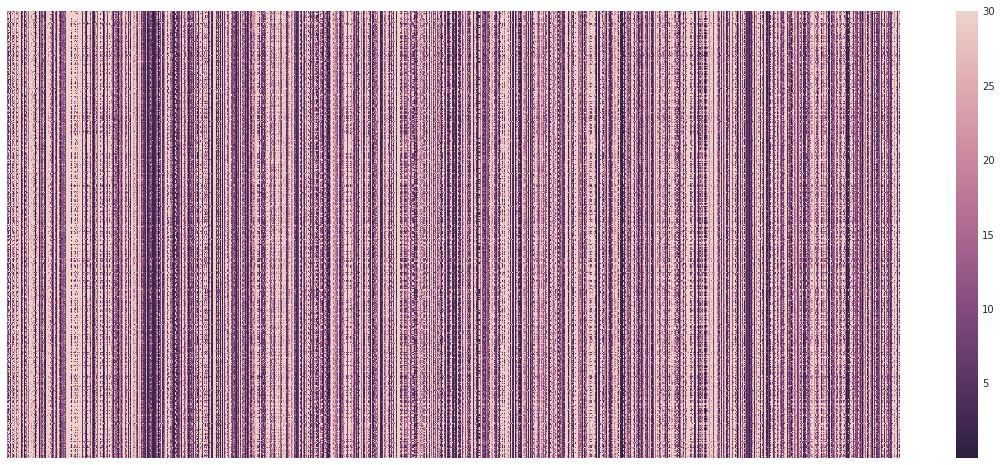

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(patient_affinities.ix[:, sorted_mutations_by_AF], 
            vmax=30, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True),
           xticklabels=False, yticklabels=False)
#plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/germline.MAF.heatmap.pdf')

In [40]:
patient_affinities.median().describe()

count    1000.000000
mean       25.445030
std        23.781044
min         0.029942
25%         7.346887
50%        17.157797
75%        36.428009
max        95.000000
dtype: float64

In [43]:
patient_mutations.mean().describe()

count    1000.000000
mean        0.588372
std         0.109900
min         0.351605
25%         0.506581
50%         0.597187
75%         0.686621
max         0.756221
dtype: float64

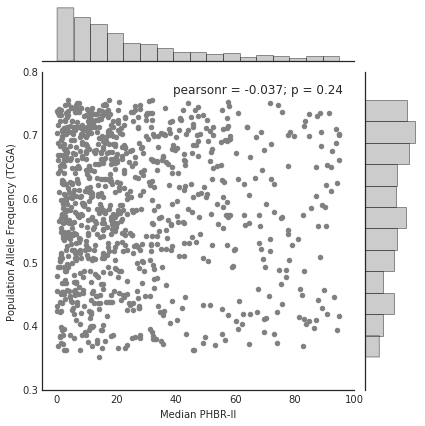

In [56]:
df = pd.DataFrame({'Median PHBR-II': list(patient_affinities.median()),
              'Population Allele Frequency (TCGA)': list(patient_mutations.mean())})
sns.jointplot('Median PHBR-II', 'Population Allele Frequency (TCGA)', data=df,
             xlim=(-5, 100), ylim=(0.3, 0.8), color='grey')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/germline.MAF.scatter.pdf')

In [23]:
print sp.spearmanr(patient_affinities.median(), patient_mutations.mean())
print sp.pearsonr(patient_affinities.median(), patient_mutations.mean())

SpearmanrResult(correlation=-0.01300009237338892, pvalue=0.68136425183317995)
(-0.036889899633034032, 0.24381717542812362)


Check mutation allelic fractions

In [29]:
exome = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/references/ESP6500SI-V2-SSA137.GRCh38-liftover.chr1.snps_indels.txt',
           sep=' ', skiprows=7)

In [37]:
def get_EA_AF(x):
    return float(x.split('/')[0])

In [39]:
exome['MAFinPercent(EA/AA/All)'].apply(get_EA_AF).sort_values()

145754     0.0000
217281     0.0000
217282     0.0000
217283     0.0000
217284     0.0000
217285     0.0000
217291     0.0000
217292     0.0000
217293     0.0000
217294     0.0000
106651     0.0000
106650     0.0000
106649     0.0000
106648     0.0000
106647     0.0000
106646     0.0000
106645     0.0000
106644     0.0000
217298     0.0000
217297     0.0000
217296     0.0000
217295     0.0000
106634     0.0000
106635     0.0000
217280     0.0000
106636     0.0000
106638     0.0000
106639     0.0000
106640     0.0000
106641     0.0000
           ...   
316885    54.1301
316884    54.1301
316892    54.1301
215982    54.9673
215980    54.9673
215979    54.9673
215978    54.9673
215977    54.9673
215981    54.9673
234366    55.2045
234365    55.2045
345329    58.1754
345323    58.1754
345324    58.1754
345325    58.1754
345326    58.1754
345327    58.1754
345328    58.1754
345330    58.1754
345315    58.2718
345316    58.2718
345319    58.2718
345318    58.2718
345322    58.2718
345321    

In [31]:
exome.columns

Index([u'#base(NCBI.37)', u'rsID', u'dbSNPVersion', u'Alleles',
       u'EuropeanAmericanAlleleCount', u'AfricanAmericanAlleleCount',
       u'AllAlleleCount', u'MAFinPercent(EA/AA/All)',
       u'EuropeanAmericanGenotypeCount', u'AfricanAmericanGenotypeCount',
       u'AllGenotypeCount', u'AvgSampleReadDepth', u'Genes', u'GeneAccession',
       u'FunctionGVS', u'hgvsProteinVariant', u'hgvsCdnaVariant',
       u'codingDnaSize', u'ConservationScorePhastCons',
       u'ConservationScoreGERP', u'GranthamScore', u'Polyphen2(Class:Score)',
       u'RefBaseNCBI37', u'ChimpAllele', u'ClinicalInfo', u'FilterStatus',
       u'OnIlluminaHumanExomeChip', u'GwasPubMedInfo',
       u'EA-EstimatedAge(kyrs)', u'AA-EstimatedAge(kyrs)', u'GRCh38Position'],
      dtype='object')